# 2.7 Практика, Scikit-learn, fit, predict

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

## Основные понятия  по теме дерево решений
 

Entropy and Information gain ﻿
Train / test split ﻿
K-fold cross-validation ﻿
Hyper parameters and Grid search ﻿
Дерево решений - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. В процессе построения дерева выбираются переменные разделение, по которым позволяет нам с большей точностью разделять исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.

Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. Могут использоваться и другие критерии.

По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели на тестовой выборке.
Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях в конкретной выборке.

Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.

В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.

# вопрос

## Начнём с простого - создайте Decision Tree классификатор, 

используя одноимённый класс из библиотеки sklearn и сохраните его в переменную dt.

﻿У дерева должны быть следующие параметры:
 
максимальная глубина - 5 уровней

минимальное число образцов в вершине для разделения - 5

Подробнее узнать об имеющихся параметрах Decision Tree можно узнать в документации.

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5)


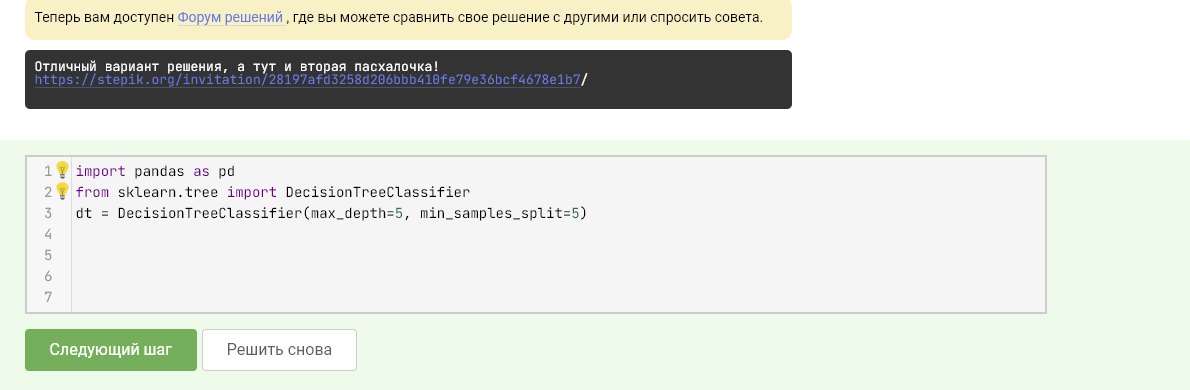

# вопрос

## Скачайте набор данных
https://stepik.org/media/attachments/course/4852/train_data_tree.csv
с тремя переменными: sex, exang, num. 
    
Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

 

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

В ответе необходимо указать число с точностью 3 знака после запятой.

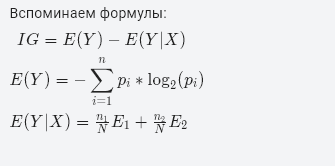

##### IG - это разница между энтропией в корне дерева и средневзвешенной энтропией двух листьев, что из нее выходят.

In [2]:
train_data_tree = pd.read_csv("train_data_tree.csv")

In [3]:
train_data_tree.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [4]:
y= train_data_tree.num
X= train_data_tree[['sex','exang']]

clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

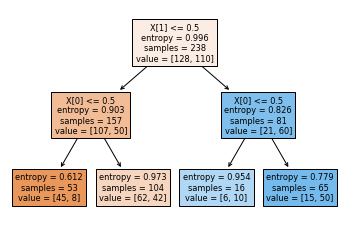

In [5]:
tree.plot_tree(clf, filled=True)

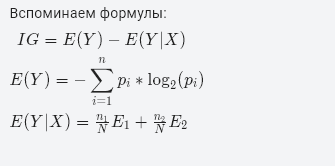

In [11]:
e_y = - 128/238 * np.log2(128/238) - 110/238 * np.log2(110/238)

In [12]:
e_y

0.9958699965528488

In [13]:
e_y_x = 157/238 * 0.903 + 81/238 * 0.826

In [14]:
e_y_x

0.8767941176470588

In [15]:
IG = e_y - e_y_x

In [16]:
IG

0.11907587890578997

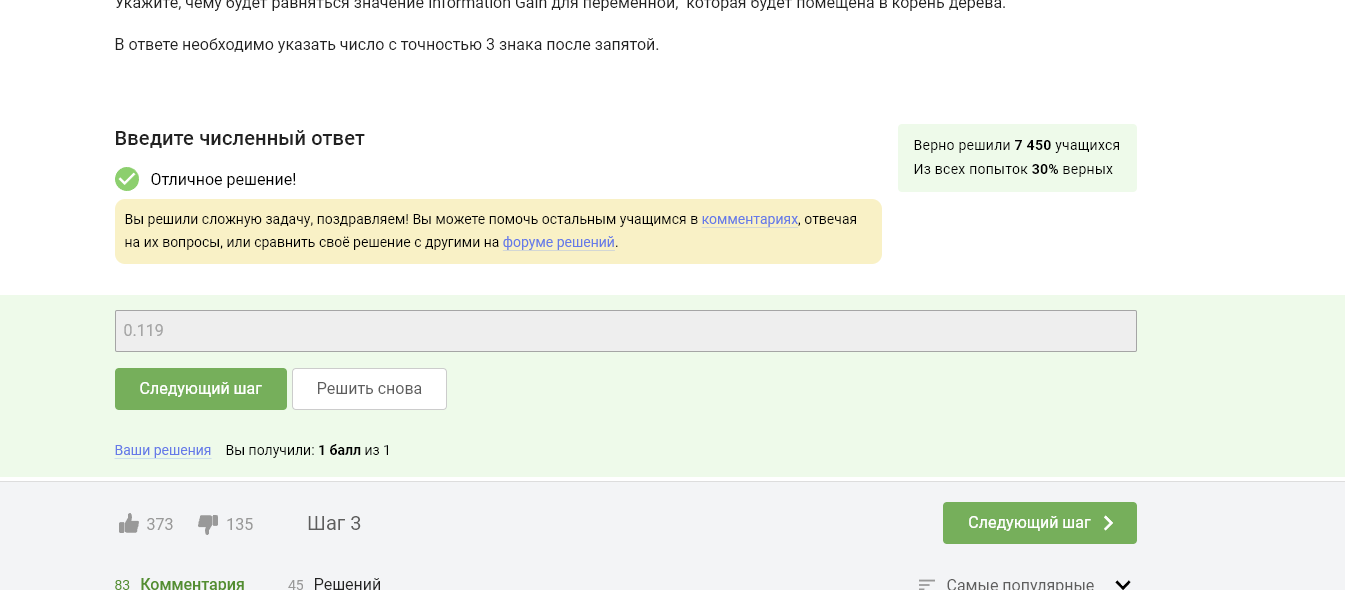

In [17]:
quantity = clf.tree_.n_node_samples # количество сэмплов (рассматриваемых вариантов) каждой ветки дерева

entropy = clf.tree_.impurity # их энтропия

entropy[0]-(quantity[1]/quantity[0]*entropy[1]+quantity[4]/quantity[0]*entropy[4])

0.11939340343891591

# вопрос

## Укажите верные утверждения
Выберите все подходящие ответы из списка

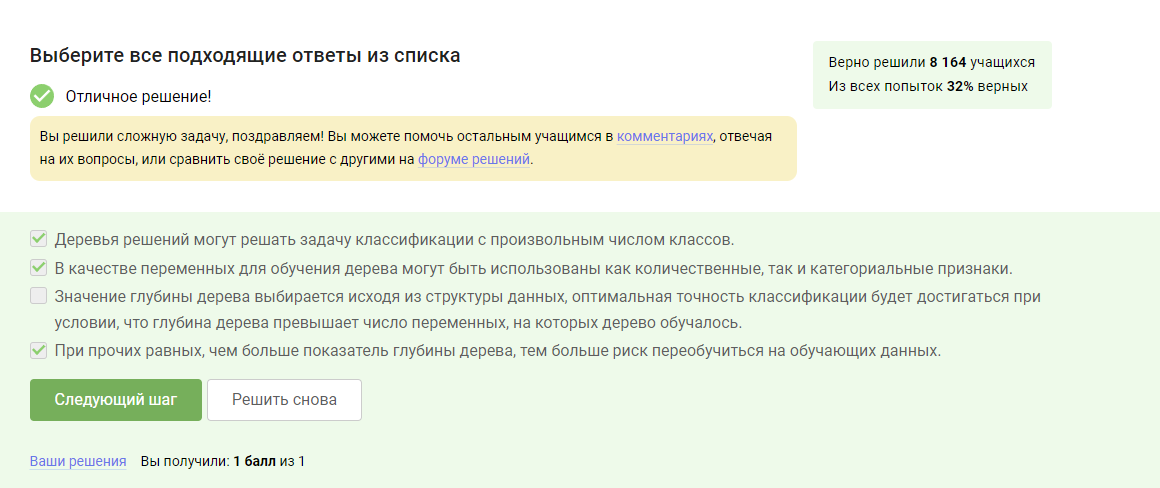

# вопрос

## Ярослав наконец-то освоил основы статистики и приступил к машинному обучению, однако, он вновь столкнулся с непреодолимыми трудностями, помогите Ярославу!

Ярослав обучил дерево решений на обучающей выборке и получил 100% точность классификатора, однако на тестовых данных точность классификатора едва превышала 50%, очевидно, что Ярослав пал жертвой переобучения.

Какие действия могут помочь в данной ситуации?

Выберите все подходящие ответы из списка

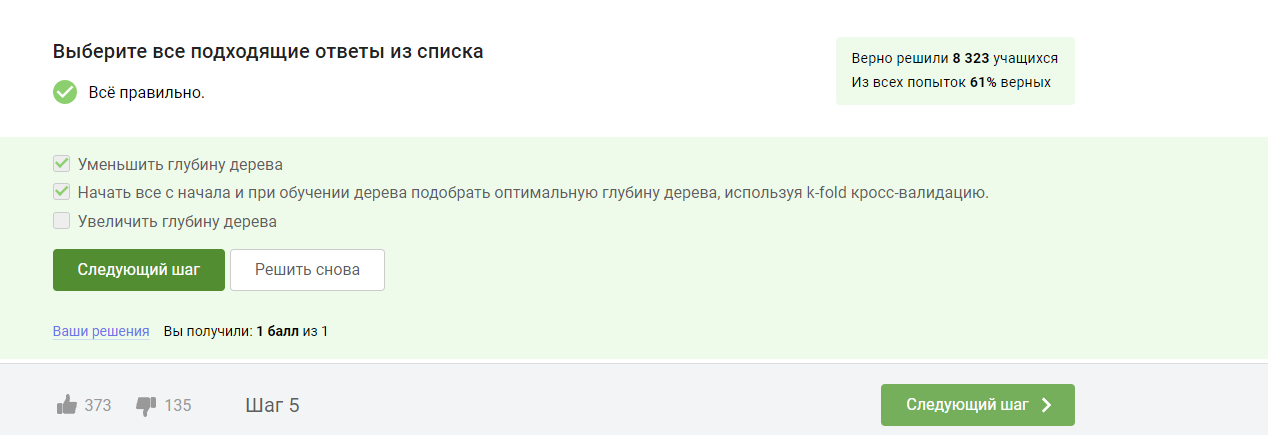

# Вопрос

###### Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, 

где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

##### В train_test_split по умолчанию стоит разбиение тестовой и тренировочной выборки в пропорции 0.25 и 0.75

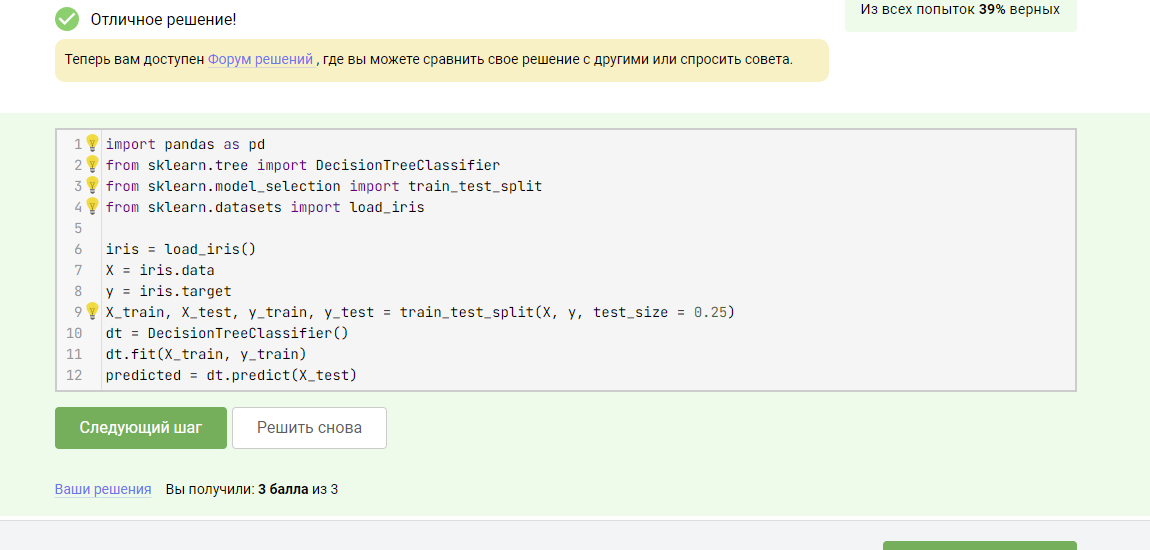

# вопрос

##### Теперь задачка на соотнесение функций sklearn и стратегий разделения датасэта для тестирования.

StratifiedKFold - позволяет сохранять соотношение классов в обучающих и тестовых подвыборках

ShuffleSplit - позволяет строить случайные перестановки, таким образом мы можем получить очень много выборок, при этом нет никаких ограничений на то, сколько раз каждый объект должен появиться в обучении или в тесте

LeaveOneOut - стратегия, которая позволяет оставить каждый объект в тесте один раз, таким образом тестовая выборка всегда состоит из одного объекта и каждый объект из набора данных один раз присутствует в тесте

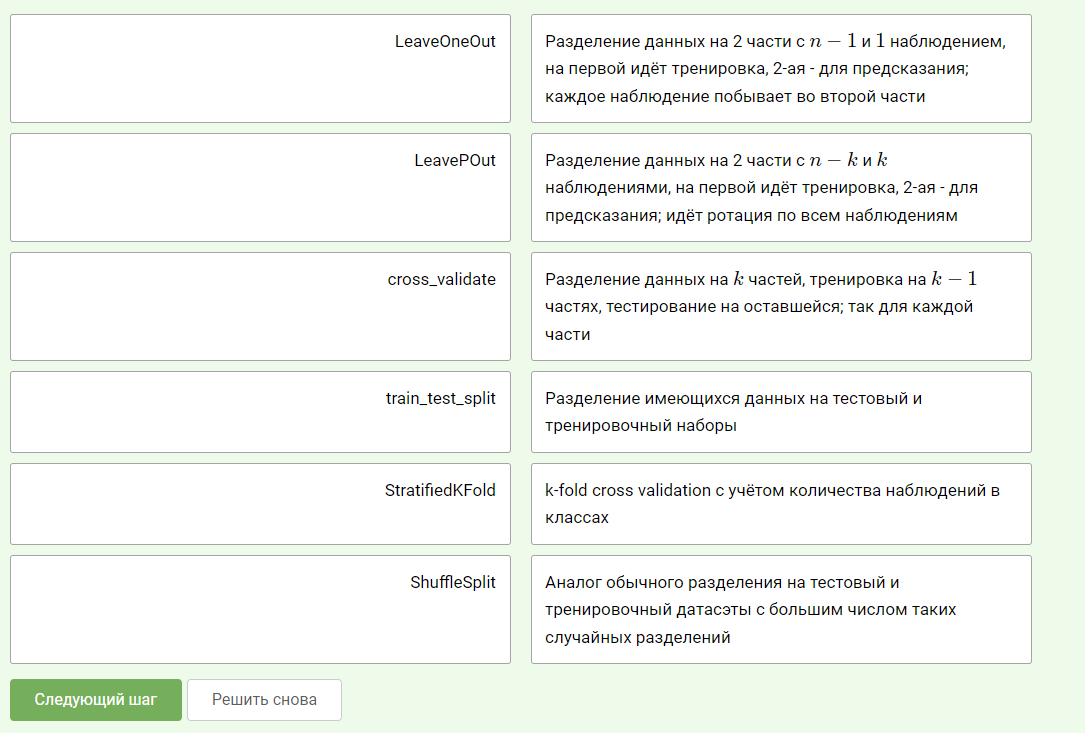

# вопрос

##### В продолжение предыдущего вопроса - расположите разные стратегии разделения данных для кросс-валидации по затратам вычислительных мощностей на последующие предсказания. Сверху самый быстрый и требующий меньше всего вычислений для валидации.

Расположите элементы списка в правильном порядке

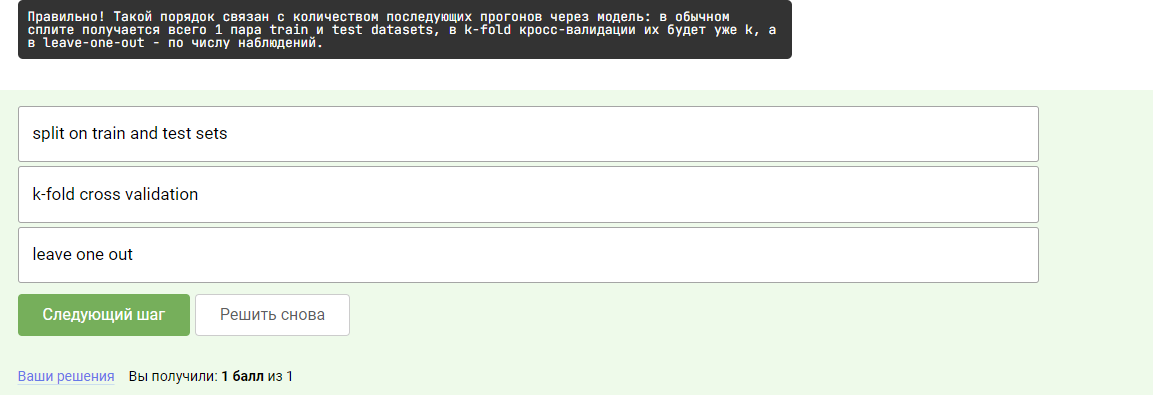

### Существуют различные способы вызова кросс-валидации в sklearn, например

cross_val_predict(estimator, x, y, cv=bar)

где estimator - предсказывающая модель, 
а bar - число блоков при k-fold кросс-валидации или объект из sklearn.model_selection, 
позволяющий осуществлять кросс-валидацию по другой стратегии.


Мы будем использовать другой способ - **GridSearchCV**, отбирающий лучшую модель по заданным параметрам, проводя кросс-валидацию.

# вопрос

## Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? 
Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.

Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.

Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:

максимальная глубина - от 1 до 10 уровней

минимальное число проб для разделения - от 2 до 10

минимальное число проб в листе - от 1 до 10

и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [ ]:
max_depth — максимальная глубина деревьев.
min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
min_samples_leaf — минимальное число объектов в листьях.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
dt = DecisionTreeClassifier()
parametrs = {'criterion': ['entropy'],
             'max_depth': range(1,10),
             'min_samples_split': range(2,10),
             'min_samples_leaf': range(1,10)}
search = GridSearchCV(dt, parametrs)

search.fit(X,y)

best_tree = search.best_estimator_

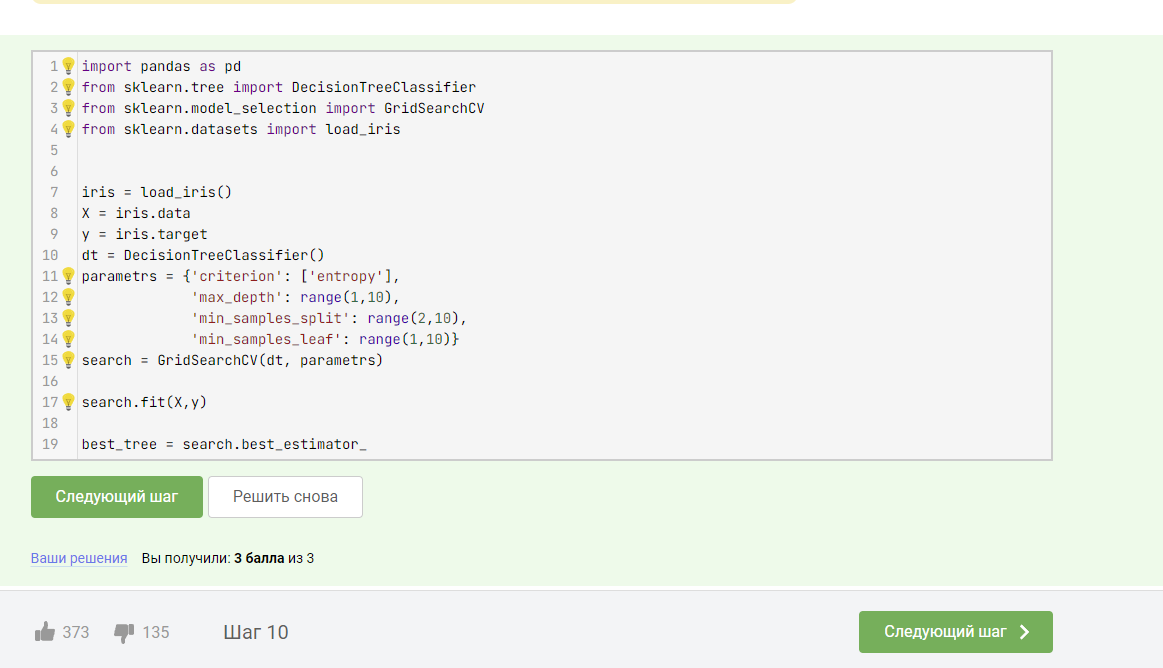

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Инициализация Дерева
dt = DecisionTreeClassifier()

# Словарь параметров для Дерева и их диапазоном значений
dt_params = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)}

# Обучение Дерева с перебором значений параметров
search = GridSearchCV(dt, param_grid=dt_params, cv=5)
search.fit(X, y)

# Дерево с лучшим сочетаением параметров
best_tree = search.best_estimator_

# вопрос

## Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. 

Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть **RandomizedSearchCV**! 

Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

Здесь можно посмотреть на сравнение этих поисков.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

максимальная глубина - от 1 до 10 уровней

минимальное число проб для разделения - от 2 до 10

минимальное число проб в листе - от 1 до 10

Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
dt = DecisionTreeClassifier()
parametrs = {'criterion': ['entropy'],
             'max_depth': range(1,11),
             'min_samples_split': range(2,11),
             'min_samples_leaf': range(1,11)}
search = RandomizedSearchCV(dt, parametrs)

search.fit(X,y)

best_tree = search.best_estimator_


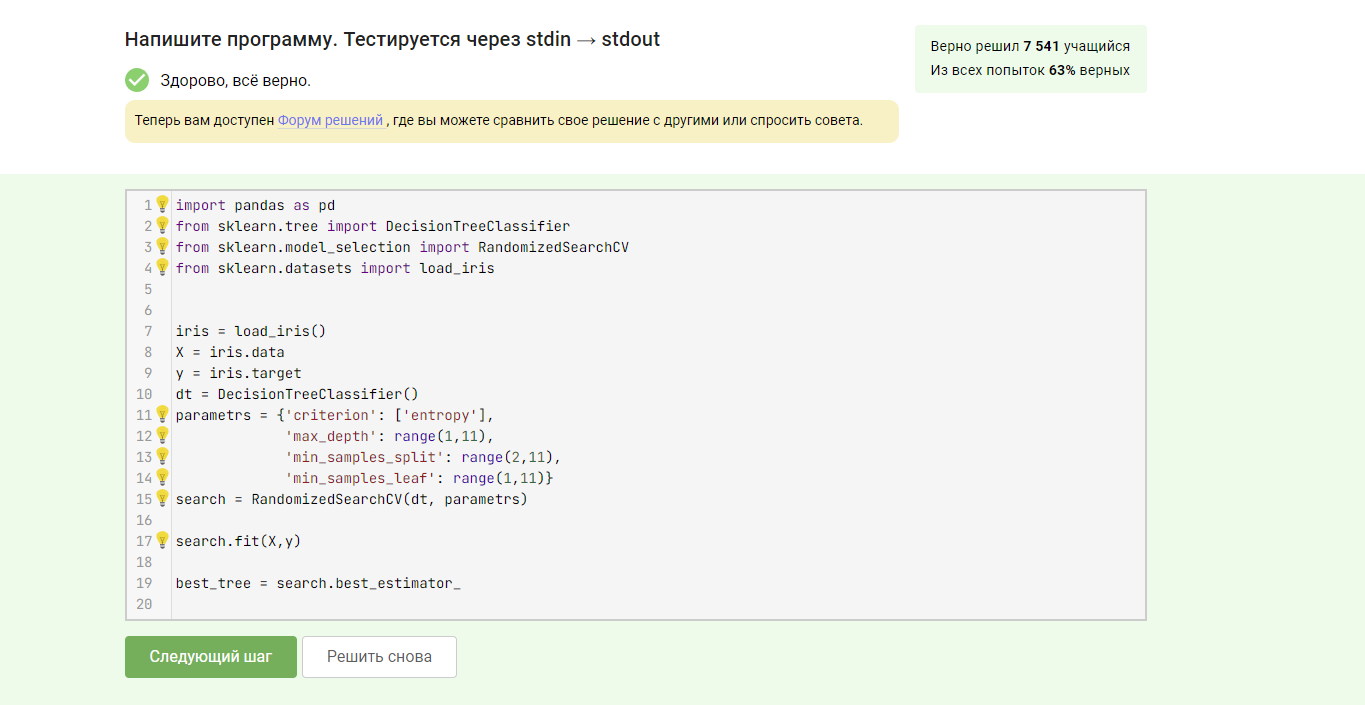

# вопрос

## Воспользуемся изученными приёмами и попредсказываем!

Даны 2 датасэта, к которым вы можете обращаться:

    train - размеченный с известными правильным ответами (хранятся в колонке y)
    test - набор, где нужно предсказать их

Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

- максимальная глубина - от 1 до 10 уровней
- минимальное число проб для разделения - от 2 до 10
- минимальное число проб в листе - от 1 до 10

Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
y_train = train['y']
X_train = train.drop('y', axis=1)
dt = DecisionTreeClassifier()
parametrs = {'criterion': ['entropy'],
             'max_depth': range(1,11),
             'min_samples_split': range(2,11),
             'min_samples_leaf': range(1,11)}
search = GridSearchCV(dt, parametrs)

search.fit(X_train,y_train)

best_tree = search.best_estimator_

predictions = best_tree.predict(test)


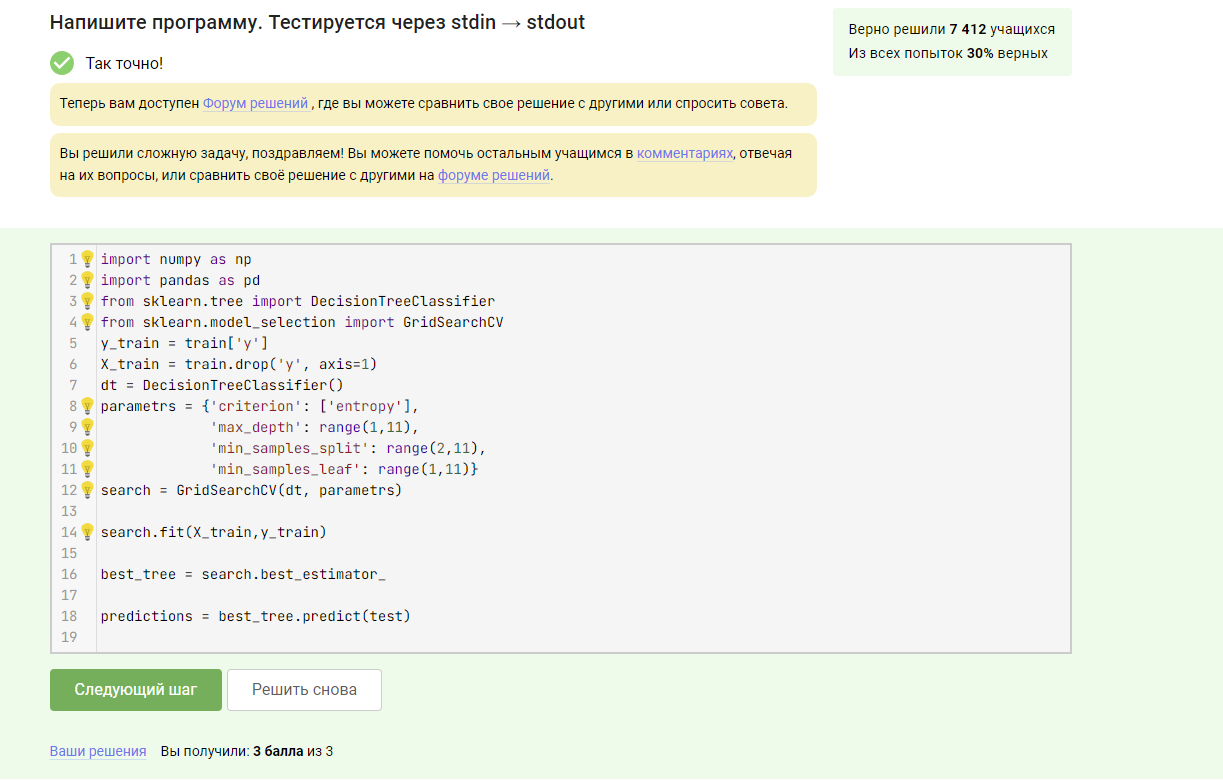

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# разбиваем датафрейм train на X и y
x_train = train.drop(["y"], axis=1)
y_train = train["y"]

# создаем словарь с параметрами, которые хотим проверить
params = {"max_depth": range(1,11), "min_samples_split":range(2,11), "min_samples_leaf":range(1,11)}

# создаем экзмпляр дерева
dt = DecisionTreeClassifier()

# создаем экземпляр GridSearchCV
search = GridSearchCV(dt, params, cv=5) # cv=5 ? зачем этот параметр

# обучаем или ищем лучшее дерево
search.fit(x_train,y_train)

# сохраням лучшее дерево по мнению GridSearchCV
best_tree = search.best_estimator_

# делаем предсказания по лучшему дереву на датасете test
predictions = best_tree.predict(test)



# вопрос

## При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. 
Существуют различные метрики оценки качества предсказаний, 
которые базируются на 4-ёх параметрах - 

true positive, 

false positive, 

false negative 

и true negative, 

соответствующих тому какой класс был присвоен наблюдениям каждого из классов. 

Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.

В sklearn можно её удобно получить с помощью функции confusion_matrix. 

Вам даны 2 эррея с истинными классами наблюдений и предсказанными - y и predictions. 

Получите по ним confusion matrix и поместите её в переменную conf_matrix.

In [ ]:
sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y, predictions)


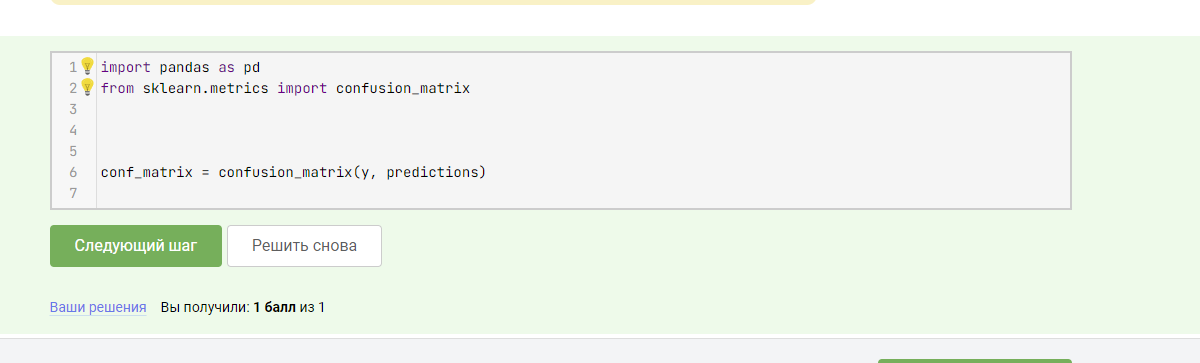

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, predictions)
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()


# вопрос

### Соотнесите описание метрик, которые выводятся из 4-ёх основных параметров, с их названиями.

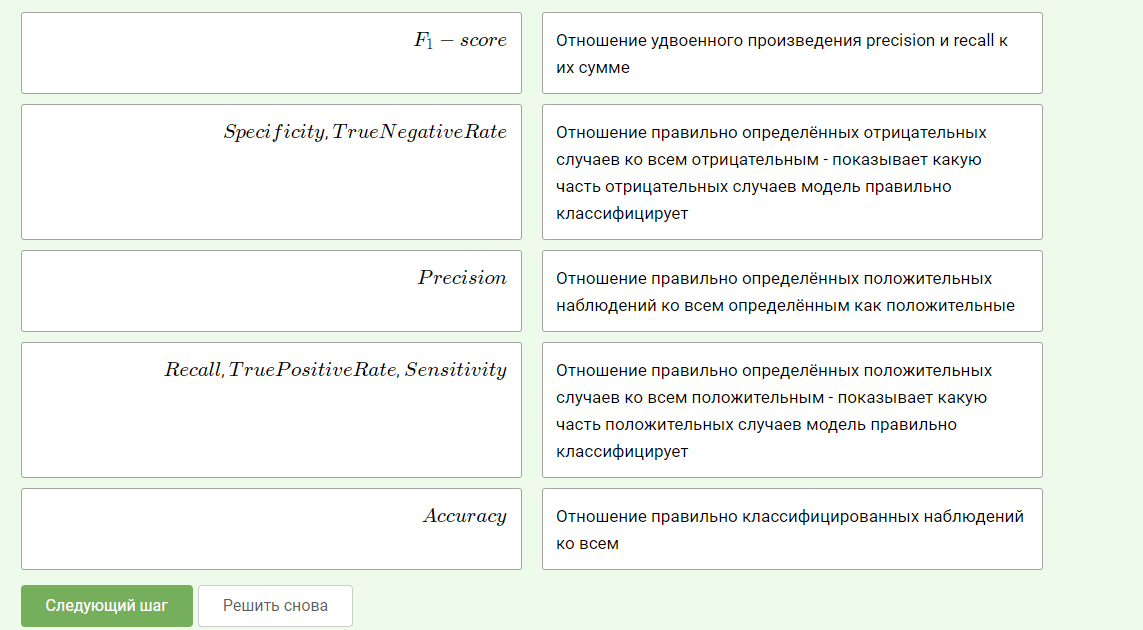